In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import mse
from array import array


In [2]:
#get out training data loaded from kaggle
kag_BtcDF = pd.read_csv("coin_Bitcoin.csv")
kag_EtcDF = pd.read_csv("coin_Ethereum.csv")
kag_DogeDF = pd.read_csv("coin_Dogecoin.csv")
kag_LtcDF = pd.read_csv("coin_Litecoin.csv")
kag_BtcDF.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11
2990,2991,Bitcoin,BTC,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11


In [5]:
testBTC = pd.read_csv("BTC_USD Binance Historical Data.csv")
testETC = pd.read_csv("ETH_USD Binance Historical Data.csv")
testDoge = pd.read_csv("DOGE_USD Binance Historical Data.csv")
testLTC = pd.read_csv("LTC_USD Binance Historical Data.csv")
testETC.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1905,1/22/2018,999.37,1022.74,1152.61,944.97,1.00K,-2.29%
1906,1/21/2018,1022.74,1178.29,1185.39,1010.84,0.67K,-13.20%
1907,1/20/2018,1178.29,979.57,1239.89,979.57,0.97K,20.29%
1908,1/19/2018,979.57,991.01,1090.00,871.00,1.71K,-1.15%
1909,1/18/2018,991.01,1006.25,1115.00,866.00,1.76K,-1.51%


In [6]:
X = testBTC[["Open","High","Low"]]
y = testBTC[["Price"]]
#y1 = []

#for x in y["Price"]:
  #y1.append(float(x.replace(',','')))

#y = pd.DataFrame(y1)

#get the last 2057 data points for our training data to match the size of our testing data
#n = 934
#X = X.iloc[n:]


#scale model
x_scale = StandardScaler()
y_scale = StandardScaler()
X = x_scale.fit_transform(X)
y = y_scale.fit_transform(y)

#split up testing and training data
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=.2,random_state=1)


In [7]:
#create model
svmMachine = svm.SVR(kernel='rbf',C=1000,gamma='auto')
svmMachine.fit(X_train,y_train)
y_pred = svmMachine.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


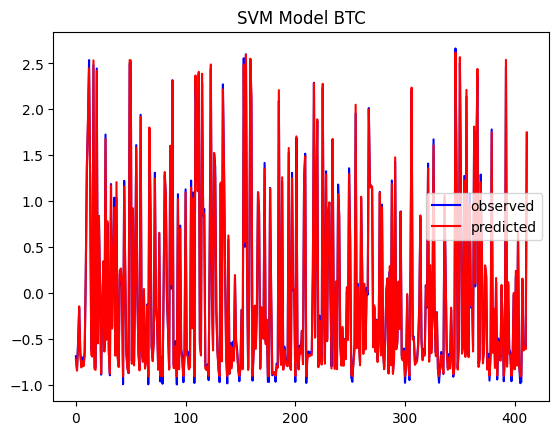

Score accuracy:  0.9982149917180372


In [8]:
x_ax = range(len(X_test))
plt.plot(x_ax,y_test, label = 'observed',color = "blue")
plt.plot(x_ax,y_pred, label = 'predicted',color = "red")
plt.title('SVM Model BTC') # adding a tittle to our plot

plt.legend()
plt.show() 

print("Score accuracy: ",svmMachine.score(X,y))

In [25]:
X = testETC[["Open","High","Low"]]
y = testETC[["Price"]]
#y1 = []

#for x in y["Price"]:
 # y1.append(float(x.replace(',','')))

#y = pd.DataFrame(y1)

#get the last 2057 data points for our training data to match the size of our testing data
#n = 250
#X = X.iloc[n:]

#scale model
x_scale = StandardScaler()
y_scale = StandardScaler()
X = x_scale.fit_transform(X)
y = y_scale.fit_transform(y)

#split up testing and training data
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=.2,random_state=1)

In [26]:
#create model
svmMachine = svm.SVR(kernel='rbf',C=1000,gamma='auto')
svmMachine.fit(X_train,y_train)
y_pred = svmMachine.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


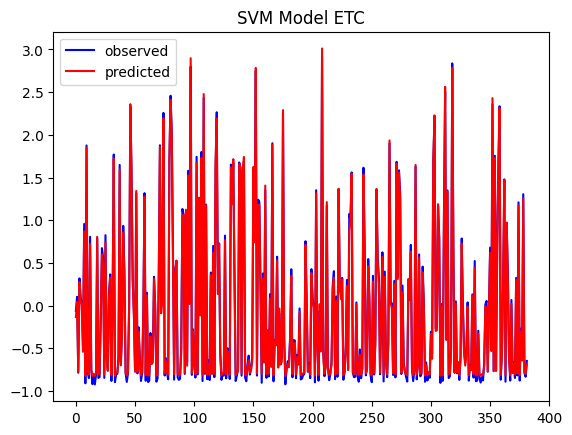

Score accuracy:  0.9975539574204072


In [27]:
x_ax = range(len(X_test))
plt.plot(x_ax,y_test, label = 'observed',color = "blue")
plt.plot(x_ax,y_pred, label = 'predicted',color = "red")
plt.title('SVM Model ETC') # adding a tittle to our plot

plt.legend()
plt.show() 

print("Score accuracy: ",svmMachine.score(X,y))

In [19]:
X = testDoge[["Open","High","Low"]]
y = testDoge[["Price"]]

#get the last 2057 data points for our training data to match the size of our testing data
#n = 1621
#X = X.iloc[n:]

#scale model
x_scale = StandardScaler()
y_scale = StandardScaler()
X = x_scale.fit_transform(X)
y = y_scale.fit_transform(y)

#split up testing and training data
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=.2,random_state=1)

In [20]:
#create model
svmMachine = svm.SVR(kernel='rbf',C=100,gamma='auto')
svmMachine.fit(X_train,y_train)
y_pred = svmMachine.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


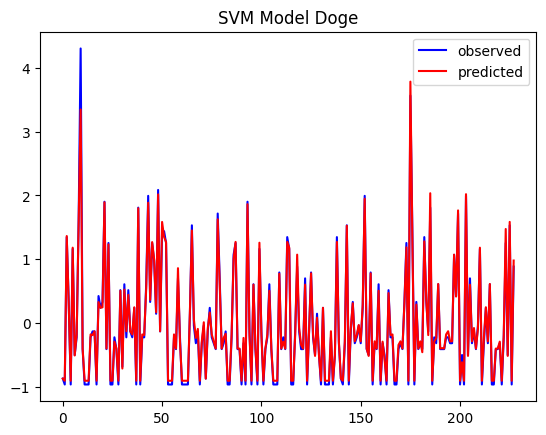

Score accuracy:  0.9959395153687447


In [21]:
x_ax = range(len(X_test))
plt.plot(x_ax,y_test, label = 'observed',color = "blue")
plt.plot(x_ax,y_pred, label = 'predicted',color = "red")
plt.title('SVM Model Doge') # adding a tittle to our plot

plt.legend()
plt.show() 

print("Score accuracy: ",svmMachine.score(X,y))

In [22]:
X = testLTC[["Open","High","Low"]]
y = testLTC[["Price"]]

#get the last 2057 data points for our training data to match the size of our testing data
#n = 1210
#X = X.iloc[n:]

#scale model
x_scale = StandardScaler()
y_scale = StandardScaler()
X = x_scale.fit_transform(X)
y = y_scale.fit_transform(y)

#split up testing and training data
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=.2,random_state=1)

In [23]:
#create model
svmMachine = svm.SVR(kernel='rbf',C=100,gamma='auto')
svmMachine.fit(X_train,y_train)
y_pred = svmMachine.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


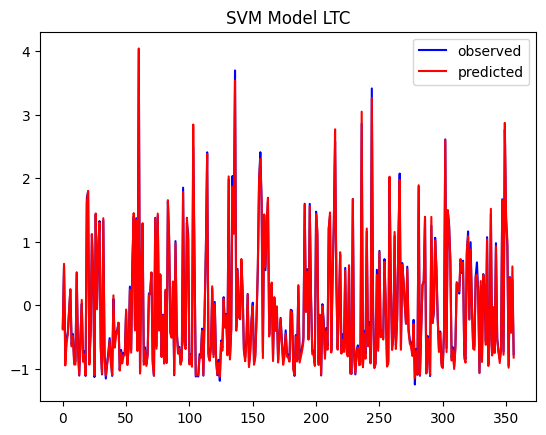

Score accuracy:  0.9969046890987625


In [24]:
x_ax = range(len(X_test))
plt.plot(x_ax,y_test, label = 'observed',color = "blue")
plt.plot(x_ax,y_pred, label = 'predicted',color = "red")
plt.title('SVM Model LTC') # adding a tittle to our plot

plt.legend()
plt.show() 

print("Score accuracy: ",svmMachine.score(X,y))